## Graficar y Ajustar Curvas en Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
from scipy.optimize import curve_fit

font = FontProperties()
#font.set_family('dejavusans')
#font.set_name('dejavusans')
font.set_size(13)

In [2]:
# VECTORES DE DATOS (X,Y)

X_0 = np.array([
15.5,
14.5,
13.5,
12.5,
11.5,
10.5,
 9.5,
 8.5,
 7.5,
 6.5,
 5.5,
 4.5,
 3.5,
 2.5,
 1.5,
 0.0,
-1.0, 
-2.0, 
-3.0, 
-4.0, 
-5.0, 
-6.0, 
-7.0, 
-8.0, 
-9.0, 
-10.0,
-11.0,
-12.0,
-13.0,
-14.0,
-15.0
]);

Y_0 = np.array([
0.01,
0.02,
0.03,
0.04,
0.08,
0.17,
0.32,
0.66,
1.18,
1.64,
1.88,
2.00,
2.07,
2.10,
2.11,
2.11,
2.11,
2.10,
2.08,
2.06,
2.00,
1.88,
1.67,
1.24,
0.70,
0.34,
0.17,
0.08,
0.04,
0.02,
0.01
]);

X_1 = np.array([
18.0,
17.0,
16.0,
15.0,
14.0,
13.5,
13.0,
12.5,
12.0,
11.5,
11.0,
10.5,
10.0,
9.6, 
9.0, 
8.5, 
8.0, 
7.5, 
7.0, 
6.75,
6.5,
6.25,
6.0,
 5.5,
 5.0,
 4.5,
 4.0,
 3.5,
 3.0,
 2.5,
 2.0,
 1.5,
 1.0,
 0.5,
 0.0,
-0.5,
-1.0,
-1.5,
-2.0,
-2.5,
-3.0,
-3.5,
-4.0,
-4.5,
-5.0
]);

Y_1 = np.array([
0.01,
0.03,
0.07,
0.14,
0.30,
0.41,
0.59,
0.83,
1.09,
1.34,
1.57,
1.73,
1.84,
1.91,
1.97,
2.01,
2.02,
2.04,
2.03,
2.06,
2.06,
2.03,
2.06,
2.04,
2.02,
1.99,
1.93,
1.86,
1.76,
1.61,
1.37,
1.13,
0.86,
0.64,
0.45,
0.31,
0.22,
0.16,
0.11,
0.09,
0.06,
0.04,
0.03,
0.02,
0.00
]);

X_2 = np.array([
12.0,
11.5,
11.0,
10.5,
10.0,
9.5, 
9.0, 
8.5, 
8.0, 
7.5, 
7.0, 
6.5, 
6.0, 
5.5, 
5.0, 
4.75,
4.50,
4.25,
4.0,
 3.5,
 3.0,
 2.5,
 2.0,
 1.5,
 1.0,
 0.5,
 0.0,
-0.5,
-1.0,
-1.5,
-2.0,
-2.5,
-3.0,
-3.5,
-4.0,
-4.5,
-5.0
]);

Y_2 = np.array([
0.02,
0.03,
0.05,
0.08,
0.10,
0.15,
0.21,
0.31,
0.46,
0.61,
0.93,
1.18,
1.40,
1.59,
1.69,
1.71,
1.74,
1.76,
1.75,
1.72,
1.64,
1.50,
1.28,
1.05,
0.78,
0.57,
0.38,
0.25,
0.18,
0.13,
0.08,
0.06,
0.02,
0.00,
0.00,
0.00,
0.00
]);


#MODELO DE FUNCIÓN A LA CUAL QUIERES AJUSTAR TUS DATOS
def fun_exp(x, mu=4*np.pi*10**(-7), I=3.89, a=0.2, N=154):
    return (((mu*I*N*a**2)/((2*(a**2 + ((a/2)+x)**2 ))**(3/2))) +((mu*I*N*a**2)/((2*(a**2 + ((a/2)-x)**2 ))**(3/2))))
#en el caso del contador Geiger sería: return bx + c

#LA FUNCIÓN CURVE_FIT recibe el modelo para ajustar y los datos medidos. 
#La función retorna los coeficientes del ajuste correspondiente.
#coef00 es el valor de la razón de cambio de la curva
#coef00, cov00 = curve_fit(fun_exp, X_0, Y_0)
#coef01, cov01 = curve_fit(fun_exp, X_0, Y_1)

#ESTABLECE LA CANTIDAD DE PUNTOS A CONSIDERAR EN LA CURVA DEL AJUSTE
#TAMBIÉN ESTABLECE EL DOMINIO DE LA CURVA DEL AJUSTE
xp0 = np.linspace(np.min(X_0), np.max(X_0), 200)
#xp1 = np.linspace(np.min(X_1), np.max(X_1), 200)
#xp00 = np.linspace(0, np.min(X_0), 200) esto es para extrapolar el modelo


#xp1 = np.linspace(np.min(X_1), np.max(X_1), 200)
#xp2 = np.linspace(np.min(X_2), np.max(X_2), 200)

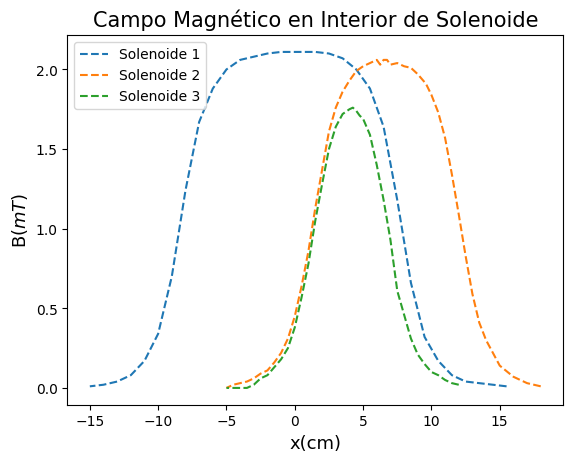

In [15]:
fig, ax = plt.subplots()

#GRAFICA LOS DATOS (X_0, Y_0) con una cantidad de puntos xp0,
#Además, grafica la curva de ajuste suavizada sobre los puntos (quinto parámetro)
ax.plot(X_0, Y_0,'--', markersize=3)
ax.plot(X_1, Y_1,'--', markersize=3)
ax.plot(X_2, Y_2,'--', markersize=3)

#ax.plot(xp0/100, fun_exp(xp0/100)*1000,'-')

#ax.plot(X_0, Y_1,'o', xp0, fun_exp(xp0, coef01[0], coef01[1], coef01[2]))


#plt.ylim([-4.5,4.5])
#plt.xlim([0,11])
plt.legend(["Solenoide 1", "Solenoide 2", "Solenoide 3"])

#TITULOS DE LA GRÁFICA
plt.xlabel(r'x(cm)', fontproperties=font)
plt.ylabel(r'B($mT$)', fontproperties=font)
plt.title(r'Campo Magnético en Interior de Solenoide', fontsize=15, math_fontfamily='dejavusans')

#SI QUIERES AGREGAR SÍMBOLOS O ECUACIONES EN LA GRÁFICA
#plt.text(3, 43, r'$\theta_2$', fontsize=18, math_fontfamily='cm')
#plt.text(3, 34, r'$\theta_1$', fontsize=18, math_fontfamily='cm')
#plt.text(-4, 11, r'$\lambda_0>\lambda_1>\lambda_2$', fontsize=18, math_fontfamily='cm')


plt.savefig('line_plot.pdf')
plt.show()
